In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv('data.csv', parse_dates=['week'], dayfirst=True)

print(df.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\1139275735.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data.csv', parse_dates=['week'], dayfirst=True)


   record_ID       week  store_id  sku_id  total_price  base_price  \
0          1 2011-01-17      8091  216418      99.0375    111.8625   
1          2 2011-01-17      8091  216419      99.0375     99.0375   
2          3 2011-01-17      8091  216425     133.9500    133.9500   
3          4 2011-01-17      8091  216233     133.9500    133.9500   
4          5 2011-01-17      8091  217390     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          52  


In [7]:
df['year'] = df['week'].dt.year
df['week_number'] = df['week'].dt.isocalendar().week

In [10]:
# Define features (X) and target (y)
X = df[['week_number', 'year', 'base_price', 'is_featured_sku', 'is_display_sku', 'lag_units_sold']]
y = df['units_sold']

In [9]:
# Drop NaN values generated from lagging
df.dropna(inplace=True)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Create a linear regression model pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                  # Feature scaling
    ('model', LinearRegression())                  # Linear regression model
])


In [13]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [14]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [15]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [16]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 21.203053412348012
Mean Squared Error: 1629.0438854582903


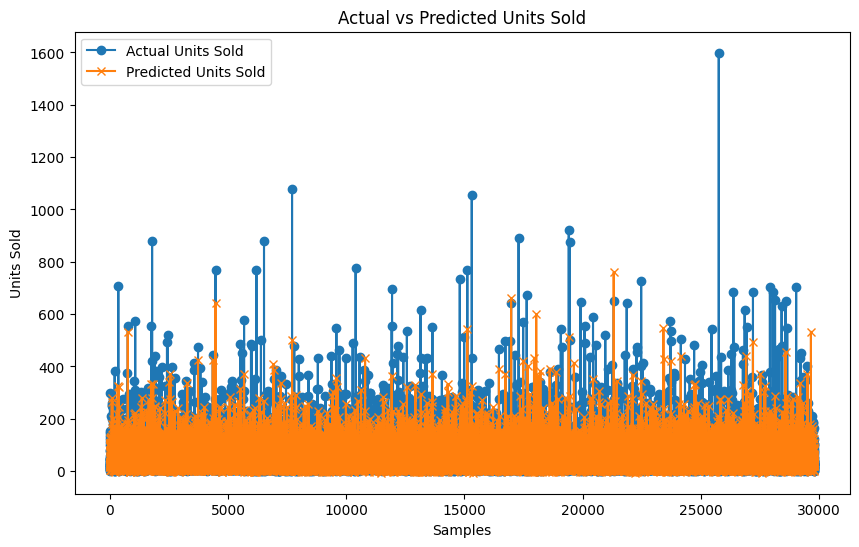

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Units Sold', marker='o')
plt.plot(y_pred, label='Predicted Units Sold', marker='x')
plt.title('Actual vs Predicted Units Sold')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

<AxesSubplot:xlabel='key'>

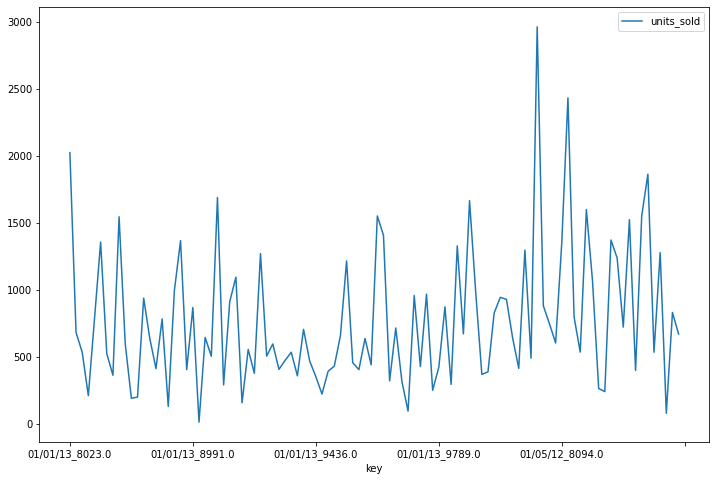

In [13]:
prep.df[:100].plot(figsize=(12,8))

# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

random_forest_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                  # Feature scaling
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest model
])

In [20]:
# Train the Random Forest model
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [21]:
# Make predictions
y_pred_rf = random_forest_pipeline.predict(X_test)

In [23]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Squared Error: {mse_rf}')

Random Forest - Mean Absolute Error: 15.509539045879738
Random Forest - Mean Squared Error: 778.8667613030444


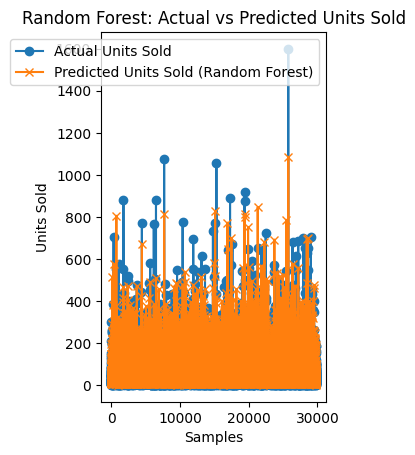

In [26]:
# Plotting actual vs predicted values for Random Forest
plt.subplot(1, 2, 2)
plt.plot(y_test.reset_index(drop=True), label='Actual Units Sold', marker='o')
plt.plot(y_pred_rf, label='Predicted Units Sold (Random Forest)', marker='x')
plt.title('Random Forest: Actual vs Predicted Units Sold')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()

# XGBoost Regression

In [35]:
from xgboost import XGBRegressor
X = df[['week_number', 'year', 'base_price', 'is_featured_sku', 'is_display_sku', 'lag_units_sold']]
y = df['units_sold']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgboost_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                  # Feature scaling
    ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))  # XGBoost model
])

In [38]:
# Train the XGBoost mode
xgboost_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_pipeline.predict(X_test)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [39]:
print(f'XGBoost - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost - Mean Squared Error: {mse_xgb}')

XGBoost - Mean Absolute Error: 14.931700612058908
XGBoost - Mean Squared Error: 754.8129996397835


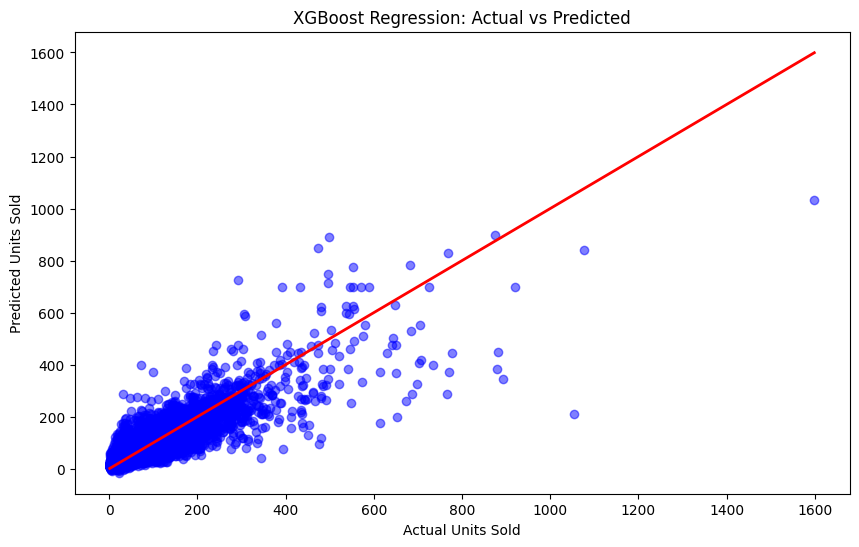

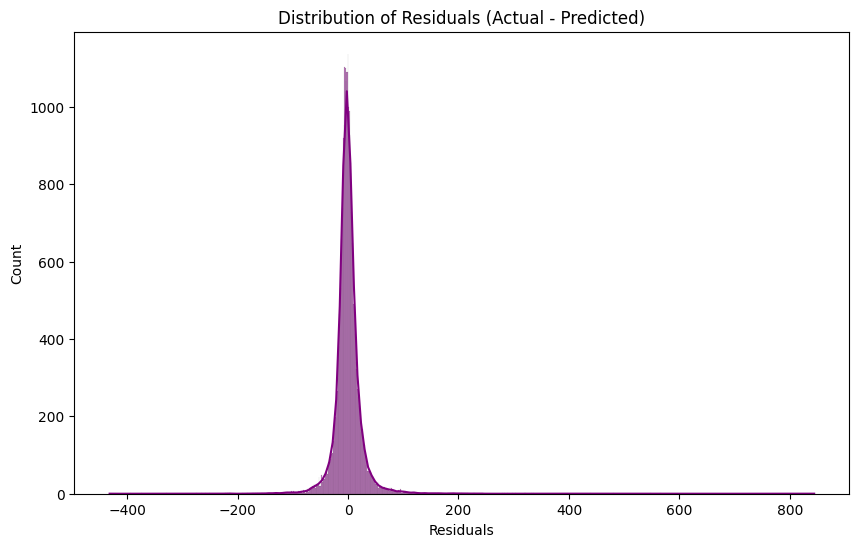

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('XGBoost Regression: Actual vs Predicted')
plt.show()

# Plotting Residual Errors
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residuals')
plt.show()


# Hyperparameter Tuning for Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [49]:
# Initialize the model
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': [None, 'sqrt', 'log2'],  # Removed 'auto' and used valid options
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the grid search to the data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [52]:
# After fitting, you can access best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

Best parameters found:  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Best cross-validation score: 0.7558


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train the final model using the best parameters from RandomizedSearchCV
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model performance on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Random Forest - Mean Absolute Error (MAE): {mae}")
print(f"Random Forest - Mean Squared Error (MSE): {mse}")
print(f"Random Forest - R^2 Score: {r2}")


Random Forest - Mean Absolute Error (MAE): 14.822842085624478
Random Forest - Mean Squared Error (MSE): 758.6516382773776
Random Forest - R^2 Score: 0.7725062401618012


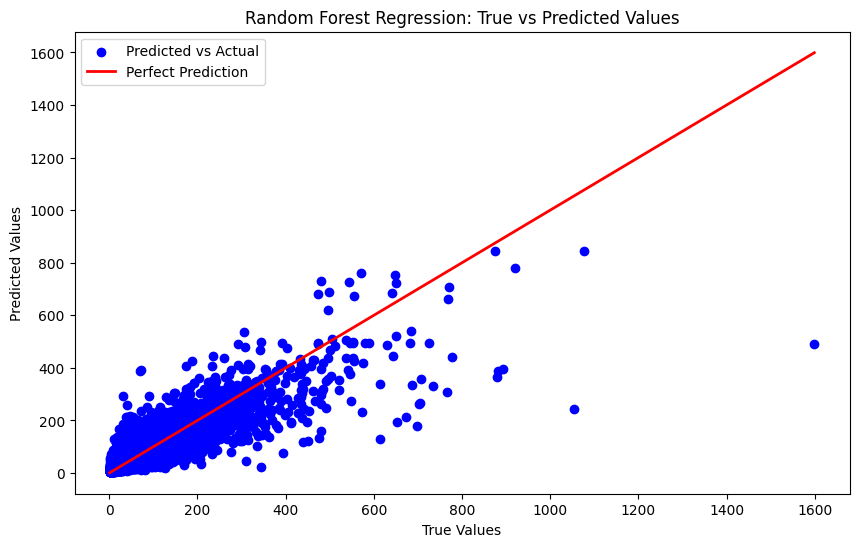

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: True vs Predicted Values')
plt.legend()
plt.show()


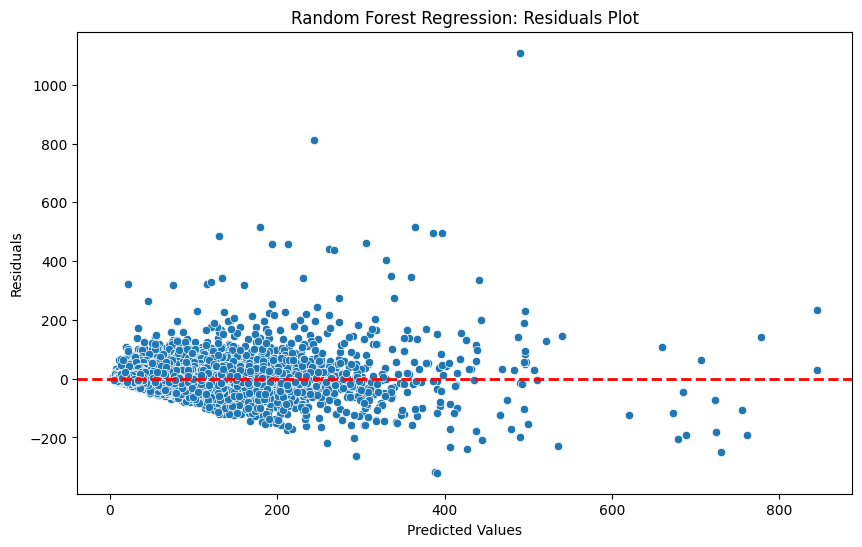

In [56]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression: Residuals Plot')
plt.show()


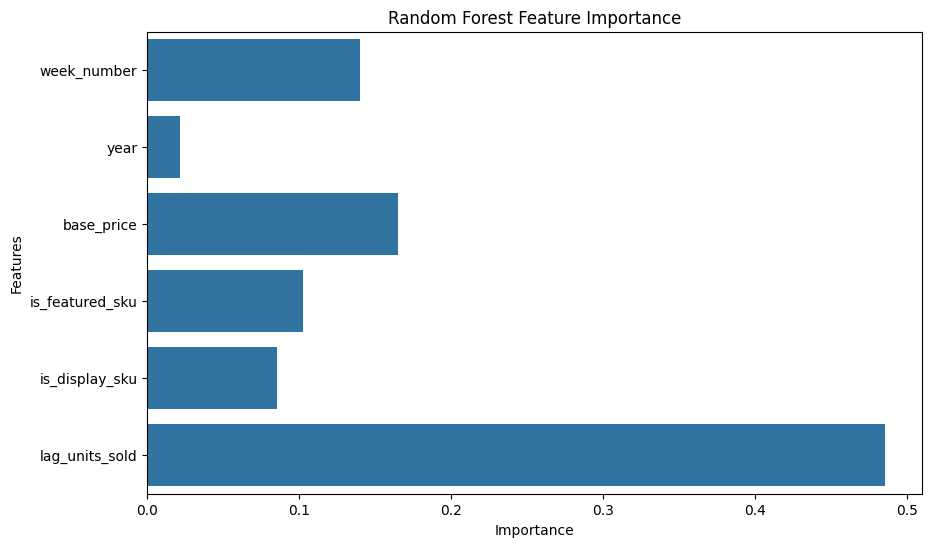

In [57]:
# Feature Importance
importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [58]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Train the model (assuming X_train, y_train are prepared)
best_rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']